In [3]:
import pandas as pd
df = pd.read_csv('employee_churn_data.csv')
df.head(9540)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [2]:
#Pre-processing data

#Check missing data

df.isnull().sum() #no missing values

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [4]:
#Check missing data

df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [5]:
sum(df['left']=='no')

6756

In [6]:
sum(df['left']=='yes')

2784

In [8]:
sum(df['left']=='yes')/(sum(df['left']=='yes')+sum(df['left']=='no'))

0.2918238993710692

In [ ]:
#training data

#Downsampling (data preprocessing)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Basic data exploration and preprocessing**

Preprocessing

In [6]:
# the original df is still going to be useful later, 
#so I make another copy of the df for other purposes like calculating correlation and modelling
df_proc = df.copy() 

#encoding the categorical data
dept_map = {"IT":1, 'logistics':2, 'retail':3, 'marketing':4, 'support':5, 
            'engineering':6, 'operations':7, 'sales':8, 'admin':9, 'finance':10}

df_proc.department = df_proc.department.map(dept_map)
df_proc.salary = df_proc.salary.map({'low':1, 'medium':2, 'high':3})
df_proc.left = df_proc.left.map({'no':0, 'yes':1})

**The department with the highest and the lowest turnover rate**

The turnover rate of the company as a whole is around 30 percent. The bar chart below is to show the turnover rate for each department.

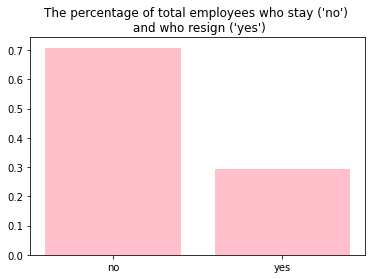

In [12]:
plt.bar(['no', 'yes'], df.left.value_counts()/df.shape[0], color='pink')
plt.title("The percentage of total employees who stay ('no') \n and who resign ('yes')");